# bancos de dados relacionais

In [ ]:
também são chamados de RDBMS = Relational Database Management System

# Teorema de CAP (ou Teorema de Brewer)

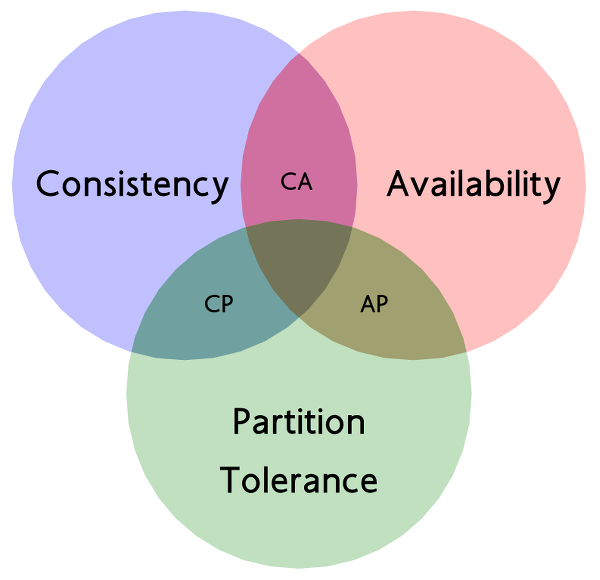

O teorema diz que um dos três elementos não serão sempre suportados. 
Portanto, você deverá priorizar dois.

Partition tolerance = tolerância a partição ou particionamento
Consistency = salvar todos os dados que você envia para ele o mais rápido possível. 
Dessa forma, sempre a informação mais recente é retornada, independente do número de partições.
Availability = estar sempre disponível, 
ou seja, o banco "salva" o dado apenas em memória, para só depois salvar realmente o dado no disco. 
isso não garante que você receba o dado mais atualizado, depende da partição a qual você está conectado.

In [ ]:
Bancos NoSQL
não utilizam o padrão de tabelas, colunas e linhas
normalmente suportam Disponibilidade e Particionamento
utilizam documentos, normalmente no padrão JSON.
alguns exemplos são: MongoDB, Cassandra, Neo4J.

### bancos SQL normalmente suportam Consistência e Particionamento

In [ ]:
tipos de dados mais comuns no SQLite
* CHARACTER ou CHAR
* VARCHAR
* BOOLEAN
* SMALLINT
* INTEGER ou INT
* DECIMAL ou DEC
* NUMERIC
* REAL
* FLOAT
* DOUBLE PRECISION
* DATE
* TIME
* DATETIME
* TIMESTAMP
* BLOB ou BINARY LARGE OBJECT

## SELECT

In [1]:
import sqlite3

In [2]:
db = sqlite3.connect('chinook.db')
#cursor para fazer uma query
cursor = db.cursor()

In [3]:
cursor.execute('''SELECT FirstName, LastName, Email, Company FROM customers LIMIT 5''')

for row in cursor:
    print('{0} {1} ({2})'.format(row[0], row[1], row[2]))
    
    if row[3] is None:
        print('\tDesempregada(o)')
    else:
        print('\tTrabalha na empresa {0}'.format(row[3]))
    print('\n')

Luís Gonçalves (luisg@embraer.com.br)
	Trabalha na empresa Embraer - Empresa Brasileira de Aeronáutica S.A.


Leonie Köhler (leonekohler@surfeu.de)
	Desempregada(o)


François Tremblay (ftremblay@gmail.com)
	Desempregada(o)


Bjørn Hansen (bjorn.hansen@yahoo.no)
	Desempregada(o)


František Wichterlová (frantisekw@jetbrains.com)
	Trabalha na empresa JetBrains s.r.o.




In [4]:
#fechamos a conexão com o banco de dados para poupar recursos
cursor.close()

## WHERE

In [5]:
import sqlite3
db = sqlite3.connect('chinook.db')
cursor = db.cursor()

cursor.execute('''SELECT FirstName, LastName, City, State 
                FROM customers WHERE Country == 'Brazil'
                LIMIT 10''')

for row in cursor:
    print('{0} {1} mora em {2}/{3}'.format(row[0], row[1], row[2], row[3]))

cursor.close()

Luís Gonçalves mora em São José dos Campos/SP
Eduardo Martins mora em São Paulo/SP
Alexandre Rocha mora em São Paulo/SP
Roberto Almeida mora em Rio de Janeiro/RJ
Fernanda Ramos mora em Brasília/DF


## ORDER BY

In [6]:
import sqlite3
db = sqlite3.connect('chinook.db')
cursor = db.cursor()

cursor.execute('''SELECT Name, Milliseconds, Composer 
                FROM Tracks
                WHERE GenreId == 2 ORDER BY Name
                LIMIT 20''')

for row in cursor:
    minutes, milliseconds = divmod(row[1], 60000)
    duration = "%02i:%02i" % (minutes, milliseconds / 1000)
    print('{0} ({1}) - {2}'.format(row[0], duration, row[2]))

cursor.close()

'Round Midnight (05:57) - Miles Davis
Amanda (04:06) - Luca Gusella
Angela (02:49) - None
As We Sleep (05:16) - None
Baltimore, DC (05:46) - John Scofield
Believe (05:10) - None
Best Thing (04:34) - None
Black Satin (05:16) - Miles Davis
Blue Rythm Fantasy (05:48) - None
Blues For Pablo (05:18) - Gil Evans
Blues For Pablo (Alternate Take) (03:32) - Gil Evans
Boogie Blues (03:24) - None
Bop Boogie (03:09) - None
Bye Bye Blackbird (07:56) - Miles Davis
Canta, Canta Mais (04:31) - None
Colibri (06:01) - Richard Bull
Compulsion (05:45) - Miles Davis
Corcovado (Quiet Nights Of Quiet Stars) (03:25) - None
Coronation Drop (02:56) - None
Dark Side Of The Cog (06:17) - Jean Paul Maunick


In [7]:
import sqlite3
from datetime import datetime
db = sqlite3.connect('chinook.db')
cursor = db.cursor()

cursor.execute('''SELECT FirstName, Title, BirthDate FROM Employees
               ORDER BY BirthDate DESC''')
               
for row in cursor:
    age = (datetime.utcnow() - datetime.strptime(row[2], '%Y-%m-%d %H:%M:%S')).days / 365
    print('{0} é um {1} e possui {2} anos'.format(row[0], row[1], round(age)))

cursor.close()

Jane é um Sales Support Agent e possui 45 anos
Michael é um IT Manager e possui 45 anos
Robert é um IT Staff e possui 48 anos
Laura é um IT Staff e possui 50 anos
Steve é um Sales Support Agent e possui 53 anos
Andrew é um General Manager e possui 56 anos
Nancy é um Sales Manager e possui 59 anos
Margaret é um Sales Support Agent e possui 71 anos


## JOIN

In [ ]:
em bancos relacionais todas as tabelas precisam de uma chave primária (Primary Key, PK).
quando dados de uma tabela precisam ser referenciados por outra, utilizamos uma chave estrangeira (Foreign Key, FK).
os relacionamentos podem ser de 4 tipos:
    Um para Um (ex.: Cliente -> Endereco)
    Um para Muitos (ex.: Cliente -> Pedidos)
    Muitos para Muitos (Produtos <-> Pedidos)
    Auto referência (Cliente -> Cliente)

In [ ]:
INNER JOIN
dados que existem nas duas tabelas

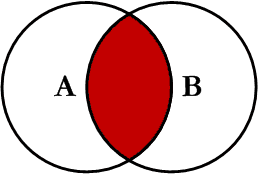

In [8]:
import sqlite3
db = sqlite3.connect('chinook.db')
cursor = db.cursor()

cursor.execute('''SELECT tracks.Name, genres.Name FROM tracks 
                   INNER JOIN genres ON tracks.genreid = genres.genreid
                   LIMIT 10''')

for row in cursor:
    print('{0} - {1}'.format(row[0], row[1]))

cursor.close()

For Those About To Rock (We Salute You) - Rock
Balls to the Wall - Rock
Fast As a Shark - Rock
Restless and Wild - Rock
Princess of the Dawn - Rock
Put The Finger On You - Rock
Let's Get It Up - Rock
Inject The Venom - Rock
Snowballed - Rock
Evil Walks - Rock


In [ ]:
LEFT JOIN
todos os dados da tabela a esquerda, 
independentemente se esses dados possuem ou não uma correspondencia na tabela da direita.
se existir uma correspondencia, será mostrado o dado das duas tabelas.

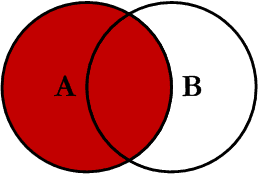

In [9]:
import sqlite3
db = sqlite3.connect('chinook.db')
cursor = db.cursor()

cursor.execute('''SELECT invoices.BillingCity, customers.FirstName, customers.LastName
                    FROM invoices INNER JOIN customers
                      ON invoices.CustomerId = customers.CustomerId LIMIT 10''')

for row in cursor:
    print('{1} {2} - invoice from {0}'.format(row[0], row[1], row[2]))

cursor.close()

Luís Gonçalves - invoice from São José dos Campos
Luís Gonçalves - invoice from São José dos Campos
Luís Gonçalves - invoice from São José dos Campos
Luís Gonçalves - invoice from São José dos Campos
Luís Gonçalves - invoice from São José dos Campos
Luís Gonçalves - invoice from São José dos Campos
Luís Gonçalves - invoice from São José dos Campos
Leonie Köhler - invoice from Stuttgart
Leonie Köhler - invoice from Stuttgart
Leonie Köhler - invoice from Stuttgart


In [10]:
import sqlite3
db = sqlite3.connect('chinook.db')
cursor = db.cursor()

cursor.execute('''SELECT invoices.BillingCity, customers.FirstName, customers.LastName
                    FROM invoices LEFT JOIN customers
                      ON invoices.CustomerId = customers.CustomerId LIMIT 10''')

for row in cursor:
    print('{1} {2} - invoice from {0}'.format(row[0], row[1], row[2]))

cursor.close()

Leonie Köhler - invoice from Stuttgart
Bjørn Hansen - invoice from Oslo
Daan Peeters - invoice from Brussels
Mark Philips - invoice from Edmonton
John Gordon - invoice from Boston
Fynn Zimmermann - invoice from Frankfurt
Niklas Schröder - invoice from Berlin
Dominique Lefebvre - invoice from Paris
Wyatt Girard - invoice from Bordeaux
Hugh O'Reilly - invoice from Dublin


In [ ]:
RIGHT JOIN

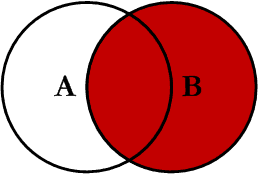

In [ ]:
FULL (OUTER) JOIN

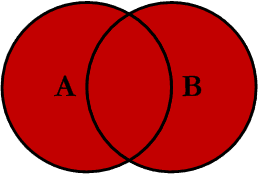

In [11]:
import sqlite3
db = sqlite3.connect('chinook.db')
cursor = db.cursor()

cursor.execute('''SELECT albums.Title, artists.Name FROM albums
                INNER JOIN artists ON albums.ArtistId = artists.ArtistId
                ORDER BY artists.Name ''')

for row in cursor:
    print('{0} - {1}'.format(row[0], row[1]))

cursor.close()

For Those About To Rock We Salute You - AC/DC
Let There Be Rock - AC/DC
A Copland Celebration, Vol. I - Aaron Copland & London Symphony Orchestra
Worlds - Aaron Goldberg
The World of Classical Favourites - Academy of St. Martin in the Fields & Sir Neville Marriner
Sir Neville Marriner: A Celebration - Academy of St. Martin in the Fields Chamber Ensemble & Sir Neville Marriner
Fauré: Requiem, Ravel: Pavane & Others - Academy of St. Martin in the Fields, John Birch, Sir Neville Marriner & Sylvia McNair
Bach: Orchestral Suites Nos. 1 - 4 - Academy of St. Martin in the Fields, Sir Neville Marriner & Thurston Dart
Balls to the Wall - Accept
Restless and Wild - Accept
Górecki: Symphony No. 3 - Adrian Leaper & Doreen de Feis
Big Ones - Aerosmith
Quiet Songs - Aisha Duo
Jagged Little Pill - Alanis Morissette
Adorate Deum: Gregorian Chant from the Proper of the Mass - Alberto Turco & Nova Schola Gregoriana
Facelift - Alice In Chains
Back to Black - Amy Winehouse
Frank - Amy Winehouse
Vivaldi: T

In [12]:
import sqlite3
db = sqlite3.connect('chinook.db')
cursor = db.cursor()

cursor.execute('''SELECT tracks.Name, albums.Title, artists.Name FROM tracks
                INNER JOIN albums ON tracks.AlbumId = albums.AlbumId
                INNER JOIN artists ON albums.ArtistId = artists.ArtistId
                LIMIT 10''')

for row in cursor:
    print('Música: {0}'.format(row[0]))
    print('Álbum: {0} - {1}'.format(row[1], row[2]))
    print('-------')

cursor.close()

Música: For Those About To Rock (We Salute You)
Álbum: For Those About To Rock We Salute You - AC/DC
-------
Música: Put The Finger On You
Álbum: For Those About To Rock We Salute You - AC/DC
-------
Música: Let's Get It Up
Álbum: For Those About To Rock We Salute You - AC/DC
-------
Música: Inject The Venom
Álbum: For Those About To Rock We Salute You - AC/DC
-------
Música: Snowballed
Álbum: For Those About To Rock We Salute You - AC/DC
-------
Música: Evil Walks
Álbum: For Those About To Rock We Salute You - AC/DC
-------
Música: C.O.D.
Álbum: For Those About To Rock We Salute You - AC/DC
-------
Música: Breaking The Rules
Álbum: For Those About To Rock We Salute You - AC/DC
-------
Música: Night Of The Long Knives
Álbum: For Those About To Rock We Salute You - AC/DC
-------
Música: Spellbound
Álbum: For Those About To Rock We Salute You - AC/DC
-------


In [12]:
import sqlite3
db = sqlite3.connect('chinook.db')
cursor = db.cursor()

cursor.execute("SELECT 'musica', 'compositor', 'genero', 'mp3', '1,00'")
cursor.execute('''SELECT tracks.Name, tracks.Composer, genres.Name, media_types.Name, tracks.UnitPrice 
                FROM tracks
                INNER JOIN genres ON tracks.GenreId = genres.GenreId
                INNER JOIN media_types ON media_types.MediaTypeId = tracks.MediaTypeId
                LIMIT 10''')

for row in cursor:
    print('-----------------')
    print('{0}, por {1}'.format(row[0], row[1]))
    print('{0} - {1}'.format(row[2], row[3]))
    print('Apenas: ${0}'.format(row[4]))

cursor.close()

-----------------
For Those About To Rock (We Salute You), por Angus Young, Malcolm Young, Brian Johnson
Rock - MPEG audio file
Apenas: $0.99
-----------------
Balls to the Wall, por None
Rock - Protected AAC audio file
Apenas: $0.99
-----------------
Fast As a Shark, por F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman
Rock - Protected AAC audio file
Apenas: $0.99
-----------------
Restless and Wild, por F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. Dirkscneider & W. Hoffman
Rock - Protected AAC audio file
Apenas: $0.99
-----------------
Princess of the Dawn, por Deaffy & R.A. Smith-Diesel
Rock - Protected AAC audio file
Apenas: $0.99
-----------------
Put The Finger On You, por Angus Young, Malcolm Young, Brian Johnson
Rock - MPEG audio file
Apenas: $0.99
-----------------
Let's Get It Up, por Angus Young, Malcolm Young, Brian Johnson
Rock - MPEG audio file
Apenas: $0.99
-----------------
Inject The Venom, por Angus Young, Malcolm Young, Brian Johnson
Rock - MPEG audio file
Apenas:

## funções

In [ ]:
* MIN: retorna o menor valor de alguma coluna
* MAX: retorna o maior valor de alguma coluna
* SUM: retorna a soma de todos os dados de uma coluna
* AVG: retorna a média de todos os dados de uma coluna
* COUNT: retorna o número de dados de uma coluna (não conta dados nulos)
* COUNT(*): retorna o número de colunas de uma tabela
* GROUP BY

In [14]:
import sqlite3
db = sqlite3.connect('chinook.db')
cursor = db.cursor()

#Fazer uma query retornando a média de duração de todos os generos de musica
cursor.execute('''SELECT genres.name, AVG(tracks.milliseconds) 
                 FROM tracks INNER JOIN genres ON tracks.genreid = genres.genreid 
                GROUP BY genres.name ORDER BY 2''')

for row in cursor:
    minutes, milliseconds = divmod(row[1], 60000)
    duration = "%02i:%02i" % (minutes, milliseconds / 1000)
    print('{0} - {1}'.format(row[0], duration))

cursor.close()

Rock And Roll - 02:14
Opera - 02:54
Hip Hop/Rap - 02:58
Easy Listening - 03:09
Bossa Nova - 03:39
R&B/Soul - 03:40
World - 03:44
Pop - 03:49
Latin - 03:52
Alternative & Punk - 03:54
Soundtrack - 04:04
Reggae - 04:07
Alternative - 04:24
Blues - 04:30
Rock - 04:43
Jazz - 04:51
Classical - 04:53
Heavy Metal - 04:57
Electronica/Dance - 05:02
Metal - 05:09
Comedy - 26:25
TV Shows - 35:45
Drama - 42:55
Science Fiction - 43:45
Sci Fi & Fantasy - 48:31


In [15]:
import sqlite3
db = sqlite3.connect('chinook.db')
cursor = db.cursor()

#Fazer uma query retornando a soma de todos os bytes por tipo de midia ordenando pela soma dos bytes
cursor.execute('''SELECT media_types.name, SUM(tracks.bytes)
                    FROM tracks INNER JOIN media_types
                      ON media_types.MediaTypeId = tracks.MediaTypeId
                   GROUP BY media_types.name ORDER BY 2''')

for row in cursor:
    gb = (row[1] / 1024) / 1024
    print('{0} - {1} GB'.format(row[0], round(gb)))

cursor.close()

AAC audio file - 47 GB
Purchased AAC audio file - 58 GB
Protected AAC audio file - 1054 GB
MPEG audio file - 24972 GB
Protected MPEG-4 video file - 85817 GB


In [16]:
import sqlite3
db = sqlite3.connect('chinook.db')
cursor = db.cursor()

#Fazer uma query retornando o nome da companhia e quantos clientes nos temos que trabalham nela
cursor.execute('''SELECT Company, COUNT(CustomerId)
                    FROM customers
                   GROUP BY Company''')

for row in cursor:
    print('{0} - {1}'.format(row[0], row[1]))

cursor.close()

None - 49
Apple Inc. - 1
Banco do Brasil S.A. - 1
Embraer - Empresa Brasileira de Aeronáutica S.A. - 1
Google Inc. - 1
JetBrains s.r.o. - 1
Microsoft Corporation - 1
Riotur - 1
Rogers Canada - 1
Telus - 1
Woodstock Discos - 1


## subqueries e expressões

In [ ]:
subquery = uma query "dentro" da outra
expressões = combinações de colunas na query
pra combinar duas colunas de texto utilizamos o operador ||

In [13]:
import sqlite3
db = sqlite3.connect('chinook.db')
cursor = db.cursor()

cursor.execute('''SELECT FirstName || ' ' || LastName
                       , (SELECT count(*) FROM invoices WHERE CustomerId = customers.CustomerId)
                       , (SELECT count(*) FROM invoices)
                       , time('now')
                       , 1 + 1
                    FROM customers
                   ORDER BY customerId desc
                   LIMIT 10''')

for row in cursor:
    print('{3} - {0} possui {1} de {2} invoices.\nFazendo as contas, 1 + 1 é igual a {4}.\n'.format(row[0], row[1], row[2], row[3], row[4]))

cursor.close()

04:48:23 - Puja Srivastava possui 6 de 412 invoices.
Fazendo as contas, 1 + 1 é igual a 2.

04:48:23 - Manoj Pareek possui 7 de 412 invoices.
Fazendo as contas, 1 + 1 é igual a 2.

04:48:23 - Luis Rojas possui 7 de 412 invoices.
Fazendo as contas, 1 + 1 é igual a 2.

04:48:23 - Diego Gutiérrez possui 7 de 412 invoices.
Fazendo as contas, 1 + 1 é igual a 2.

04:48:23 - Mark Taylor possui 7 de 412 invoices.
Fazendo as contas, 1 + 1 é igual a 2.

04:48:23 - Steve Murray possui 7 de 412 invoices.
Fazendo as contas, 1 + 1 é igual a 2.

04:48:23 - Phil Hughes possui 7 de 412 invoices.
Fazendo as contas, 1 + 1 é igual a 2.

04:48:23 - Emma Jones possui 7 de 412 invoices.
Fazendo as contas, 1 + 1 é igual a 2.

04:48:23 - Joakim Johansson possui 7 de 412 invoices.
Fazendo as contas, 1 + 1 é igual a 2.

04:48:23 - Enrique Muñoz possui 7 de 412 invoices.
Fazendo as contas, 1 + 1 é igual a 2.

